<a href="https://colab.research.google.com/github/satyambhatt5/Data_science/blob/main/27_Dec_Cat_Dog(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown https://drive.google.com/file/d/1G06c1stUzD5IFmQrTiSpJo2eFlVjD52z/view?usp=sharing

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1G06c1stUzD5IFmQrTiSpJo2eFlVjD52z
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/file/d/1G06c1stUzD5IFmQrTiSpJo2eFlVjD52z/view?usp=sharing
To: /content/view?usp=sharing
62.5kB [00:00, 9.04MB/s]


In [ ]:
! gdown https://drive.google.com/uc?id=1G06c1stUzD5IFmQrTiSpJo2eFlVjD52z

Downloading...
From: https://drive.google.com/uc?id=1G06c1stUzD5IFmQrTiSpJo2eFlVjD52z
To: /content/data_generator_small.zip
9.01MB [00:00, 42.1MB/s]


In [ ]:
! unzip data_generator_small.zip

Archive:  data_generator_small.zip
   creating: data_generator_small/cat/
  inflating: data_generator_small/cat/cat.100.jpg  
  inflating: data_generator_small/cat/cat.101.jpg  
  inflating: data_generator_small/cat/cat.102.jpg  
  inflating: data_generator_small/cat/cat.103.jpg  
  inflating: data_generator_small/cat/cat.104.jpg  
  inflating: data_generator_small/cat/cat.105.jpg  
  inflating: data_generator_small/cat/cat.106.jpg  
  inflating: data_generator_small/cat/cat.107.jpg  
  inflating: data_generator_small/cat/cat.108.jpg  
  inflating: data_generator_small/cat/cat.109.jpg  
  inflating: data_generator_small/cat/cat.110.jpg  
  inflating: data_generator_small/cat/cat.111.jpg  
  inflating: data_generator_small/cat/cat.112.jpg  
  inflating: data_generator_small/cat/cat.113.jpg  
  inflating: data_generator_small/cat/cat.114.jpg  
  inflating: data_generator_small/cat/cat.115.jpg  
  inflating: data_generator_small/cat/cat.116.jpg  
  inflating: data_generator_small/cat/cat.

In [ ]:
cat_folder="./data_generator_small/cat/"

In [ ]:
dog_folder="./data_generator_small/dog/"

In [ ]:
import os

In [ ]:
os.listdir(dog_folder)

In [ ]:
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


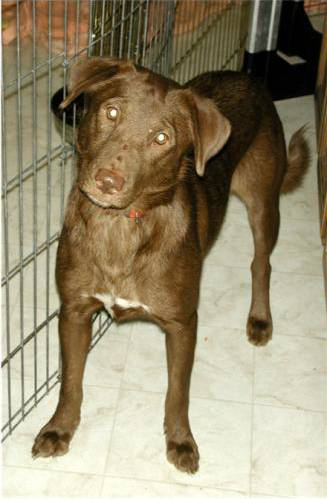

In [ ]:
Image.open(dog_folder+"dog.1.jpg")

In [ ]:
img1=cv2.imread(dog_folder+"dog.0.jpg")

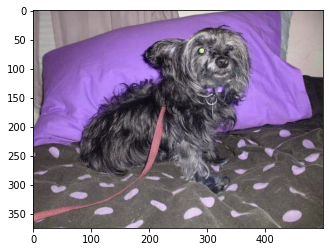

In [ ]:
plt.imshow(img1)

In [ ]:
img1.shape

(375, 499, 3)

In [ ]:
img2=cv2.imread(cat_folder+"cat.100.jpg")

In [ ]:
img2.shape

(499, 403, 3)

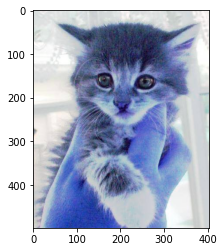

In [ ]:
plt.imshow(img2)

In [ ]:
# 1. Read all images and labels
# 2. Make all images same in terms of height and width
# 3. Divide the data into train, test and validation

In [ ]:
X = []
Y = []
for imagename in os.listdir(cat_folder):
  image=cv2.imread(cat_folder+imagename)
  image=cv2.resize(image,(150,150))
  X.append(image)
  Y.append('cat')

for imagename in os.listdir(dog_folder):
  image=cv2.imread(dog_folder+imagename)
  image=cv2.resize(image,(150,150))
  X.append(image)
  Y.append('dog')

In [ ]:
len(X)

401

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
X.shape

(401, 150, 150, 3)

In [ ]:
Y.shape

(401,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 150, 150, 3)
(41, 150, 150, 3)
(360,)
(41,)


In [ ]:
x_train=x_train/255


In [ ]:
import tensorflow as tf

In [ ]:
label_dictionary={'cat':0,'dog':1}

In [ ]:
y_train=np.vectorize(label_dictionary.get)(y_train)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(150,150,3)))
model.add(tf.keras.layers.Dense(256,tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(64,tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(2,tf.keras.activations.softmax))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               17280256  
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 17,296,834
Trainable params: 17,296,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
400*150*150*3

27000000

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [ ]:
model_history = model.fit(x=x_train,y=y_train,epochs=30,validation_split=0.1)

Epoch 1/30
11/11 [==============================] - 1s 83ms/step - loss: 0.6242 - acc: 0.6481 - val_loss: 0.8185 - val_acc: 0.4444
Epoch 2/30
11/11 [==============================] - 1s 79ms/step - loss: 0.6688 - acc: 0.6049 - val_loss: 0.7140 - val_acc: 0.5833
Epoch 3/30
11/11 [==============================] - 1s 77ms/step - loss: 0.6821 - acc: 0.5741 - val_loss: 0.7195 - val_acc: 0.5000
Epoch 4/30
11/11 [==============================] - 1s 77ms/step - loss: 0.6372 - acc: 0.6358 - val_loss: 0.9802 - val_acc: 0.4722
Epoch 5/30
11/11 [==============================] - 1s 78ms/step - loss: 0.6653 - acc: 0.6111 - val_loss: 0.6820 - val_acc: 0.6389
Epoch 6/30
11/11 [==============================] - 1s 92ms/step - loss: 0.6069 - acc: 0.6451 - val_loss: 1.2310 - val_acc: 0.4722
Epoch 7/30
11/11 [==============================] - 1s 75ms/step - loss: 0.6903 - acc: 0.6420 - val_loss: 0.8606 - val_acc: 0.5556
Epoch 8/30
11/11 [==============================] - 1s 75ms/step - loss: 0.6732 - a

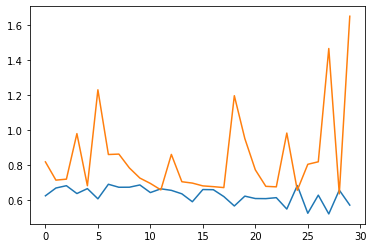

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

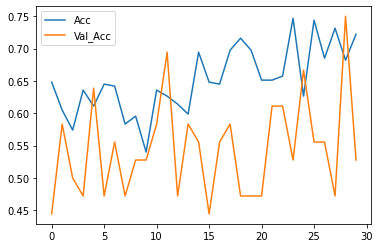

In [ ]:
plt.plot(model_history.history["acc"], label="Acc")
plt.plot(model_history.history["val_acc"], label="Val_Acc")
plt.legend()

In [ ]:
x_test=x_test/255

In [ ]:
y_test=np.vectorize(label_dictionary.get)(y_test)

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 18ms/step - loss: 1.7143 - acc: 0.5122


[1.7142689228057861, 0.5121951103210449]

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.51      1.00      0.68        21

    accuracy                           0.51        41
   macro avg       0.26      0.50      0.34        41
weighted avg       0.26      0.51      0.35        41



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sum(y_pred)

41

In [ ]:
sum(y_test)

21

In [ ]:
! kaggle competitions download -c dogs-vs-cats

In [ ]:
import kaggle

In [ ]:
! mkdir -p /root/.kaggle 
! cp kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

In [ ]:
! unzip -q train.zip